In [91]:
import pandas as pd
import numpy as np

import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

import string
import re

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [92]:
df1 = pd.read_pickle("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/cuisinedata.pkl")

In [93]:
"""le = LabelEncoder()
df1["Cuisine"] = le.fit_transform(df1["Cuisine"])"""

'le = LabelEncoder()\ndf1["Cuisine"] = le.fit_transform(df1["Cuisine"])'

In [94]:
df1.drop_duplicates(inplace=True)
df1.reset_index()

,index,Ingredients,Explanation,Method,Cuisine
0,0,4 x 300g/10½oz aged sirloin steaks 4 tbsp oliv...,This steak recipe works as a quick and easy mi...,MethodSeason the steaks with salt and pepper a...,Asian
1,1,4 thick salmon steaks2.5cm/1in piece root ging...,None,MethodPut the fish steaks in a fairly shallow ...,Asian
2,2,"For the beef2 onions, peeled, quartered5cm/2in...","The point of a stew, it should go without sayi...",MethodPreheat the oven to 150C/300F/Gas 2. For...,Asian
3,3,For the pulled pork5 tbsp soy sauce 4 tbsp chi...,This recipe is perfect for when you have a gan...,MethodPreheat the oven to 150C/130C Fan/Gas 2....,Asian
4,4,"For the marinade5 spring onions, roughly chopp...","Lime, mint and basil bring a refreshing twist ...","MethodIn a large bowl, mix together the spring...",Asian
...,...,...,...,...,...
5898,5898,2 cups balsamic vinegar4 extra large sea scall...,None,In a s...,Greek
5899,5899,1 3/4 cups all purpose flour1/3 cup powdered s...,"This candy-like tart with hints of rose, orang...",Blend ...,Greek
5900,5900,a 1-pound firm eggplantolive oil for brushing ...,None,Prehea...,Greek
5901,5901,1 pound ground lamb (not too lean)1/4 cup minc...,Can be prepared in 45 minutes or less.,In a b...,Greek


In [95]:
df1.drop(0,inplace=True)

In [96]:
df1

,Ingredients,Explanation,Method,Cuisine
1,4 thick salmon steaks2.5cm/1in piece root ging...,None,MethodPut the fish steaks in a fairly shallow ...,Asian
2,"For the beef2 onions, peeled, quartered5cm/2in...","The point of a stew, it should go without sayi...",MethodPreheat the oven to 150C/300F/Gas 2. For...,Asian
3,For the pulled pork5 tbsp soy sauce 4 tbsp chi...,This recipe is perfect for when you have a gan...,MethodPreheat the oven to 150C/130C Fan/Gas 2....,Asian
4,"For the marinade5 spring onions, roughly chopp...","Lime, mint and basil bring a refreshing twist ...","MethodIn a large bowl, mix together the spring...",Asian
5,"For the green curry paste1 shallot, peeled, fi...",None,"MethodFor the green curry paste, place all of ...",Asian
...,...,...,...,...
5898,2 cups balsamic vinegar4 extra large sea scall...,None,In a s...,Greek
5899,1 3/4 cups all purpose flour1/3 cup powdered s...,"This candy-like tart with hints of rose, orang...",Blend ...,Greek
5900,a 1-pound firm eggplantolive oil for brushing ...,None,Prehea...,Greek
5901,1 pound ground lamb (not too lean)1/4 cup minc...,Can be prepared in 45 minutes or less.,In a b...,Greek


In [97]:
df = df1.drop(columns = ["Explanation", "Method"])

In [98]:
df1.Cuisine.value_counts()

Italian             1427
British/Irish       1160
Mexican             1091
Asian                532
French               520
Indian/Pakistani     420
Spain/Portuegese     377
Greek                375
Name: Cuisine, dtype: int64

# Data Preprocessing

In [99]:
df = df.reset_index()
df

,index,Ingredients,Cuisine
0,1,4 thick salmon steaks2.5cm/1in piece root ging...,Asian
1,2,"For the beef2 onions, peeled, quartered5cm/2in...",Asian
2,3,For the pulled pork5 tbsp soy sauce 4 tbsp chi...,Asian
3,4,"For the marinade5 spring onions, roughly chopp...",Asian
4,5,"For the green curry paste1 shallot, peeled, fi...",Asian
...,...,...,...
5897,5898,2 cups balsamic vinegar4 extra large sea scall...,Greek
5898,5899,1 3/4 cups all purpose flour1/3 cup powdered s...,Greek
5899,5900,a 1-pound firm eggplantolive oil for brushing ...,Greek
5900,5901,1 pound ground lamb (not too lean)1/4 cup minc...,Greek


In [100]:
df.drop(columns=["index"],inplace=True)

In [101]:
df.isnull().sum()

Ingredients    0
Cuisine        0
dtype: int64

In [102]:
df.Ingredients.iloc[8]

'200g/7oz beef fillet, sliced thinlysal and freshly ground black pepperolive oil75ml/3fl oz coconut milk2.5cm/1in piece fresh ginger110ml/4fl oz rice wine vinegar110g/4oz caster sugar50ml/2fl oz Thai fish sauce (nam pla)2 tsp dried chilli flakes50g/2oz cashew nuts, finely chopped1 small bunch fresh coriander, roughly choppedvegetable oil for deep frying40g/1½oz ready-made rice noodles2 Little Gem lettuces'

# Data Cleaning

In [103]:
#Noktalama işaretlerini temizleyelim

import string

noktalama_isaretleri = string.punctuation
def noktalama_temizleme(metin):
    return metin.translate(str.maketrans('', '', noktalama_isaretleri))

df["Ingredients"] = df["Ingredients"].apply(noktalama_temizleme)

In [104]:
#tüm karakterleri küçük harf yaptık
df["Ingredients"] = df["Ingredients"].str.lower()
df["Ingredients"] = df["Ingredients"].str.split()

In [105]:
def strip_element(my_list):
    return [x.strip() for x in my_list]

df['Ingredients']=df['Ingredients'].apply(strip_element)

In [106]:
df

,Ingredients,Cuisine
0,"[4, thick, salmon, steaks25cm1in, piece, root,...",Asian
1,"[for, the, beef2, onions, peeled, quartered5cm...",Asian
2,"[for, the, pulled, pork5, tbsp, soy, sauce, 4,...",Asian
3,"[for, the, marinade5, spring, onions, roughly,...",Asian
4,"[for, the, green, curry, paste1, shallot, peel...",Asian
...,...,...
5897,"[2, cups, balsamic, vinegar4, extra, large, se...",Greek
5898,"[1, 34, cups, all, purpose, flour13, cup, powd...",Greek
5899,"[a, 1pound, firm, eggplantolive, oil, for, bru...",Greek
5900,"[1, pound, ground, lamb, not, too, lean14, cup...",Greek


In [107]:
df['Ingredients'] = [' '.join(map(str, l)) for l in df['Ingredients']]

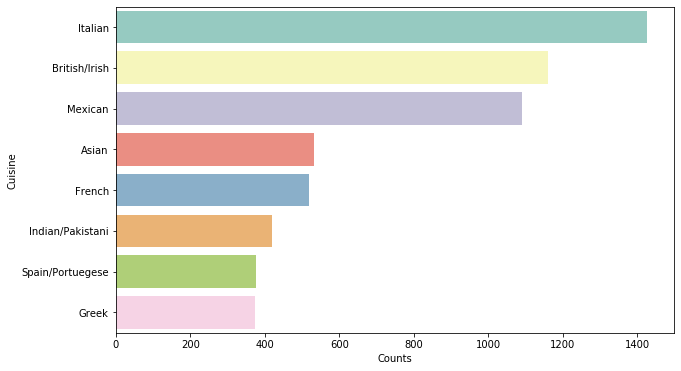

In [108]:
plt.figure(figsize=[10,6])
sns.countplot(data=df, y = "Cuisine", order = df.Cuisine.value_counts().index, palette="Set3")
plt.ylabel("Cuisine");
plt.xlabel("Counts");

plt.savefig("cuisine.jpeg", bbox_inches="tight", dpi =600)

In [109]:
#herhangi bir ölçü miktar bildiren sayıları gosterimleri cıkardık
import re 
  
def remove(list): 
    pattern = '[^a-z]'
    list = [re.sub(pattern, ' ', i) for i in list] 
    return list
  
df["Ingredients"] = remove(df.Ingredients)

In [110]:
# Stopwordleri atalım

#nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Ingredients"] = df["Ingredients"].apply(remove_stopwords)

In [111]:
# Kelime köklerini alalım
"""
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english", ignore_stopwords=True)
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df["Ingredients"] = df["Ingredients"].apply(stem_words)"""

'\nfrom nltk.stem.snowball import SnowballStemmer\n\nstemmer = SnowballStemmer("english", ignore_stopwords=True)\ndef stem_words(text):\n    return " ".join([stemmer.stem(word) for word in text.split()])\ndf["Ingredients"] = df["Ingredients"].apply(stem_words)'

In [112]:
#miktar ve yontem bildiren gosterimleri cıkardık
kelimeler = ["kilo","kg","ml","cm","lb","g","oz","fl","teaspoons",
              "teaspoon","tablespoon","tablespoons","ounces",
            "ounce","pound","pounds","tbs","tbsp","tsp","fresh",
              "chopped","chops","trimmed","large","all-purpose",
            "cups","plus","extra","grated","freshly","crushed",
              "minced","skinless","low","diced","sliced",
            "thinly","unsalted","coarse","medium","powdered",
              "finely","fine","pitted","plain","chop","low-fat",
              "full-fat","nonfat","fat-free","roughly","cup"]

def words(text):
    return " ".join([word for word in str(text).split() if word not in kelimeler])
df["Ingredients"] = df["Ingredients"].apply(words)

In [113]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['Ingredients'] = df.Ingredients.apply(lemmatize_text)

In [114]:
df['Ingredients'] = [' '.join(map(str, l)) for l in df['Ingredients']]

In [115]:
df.Cuisine.value_counts()

Italian             1427
British/Irish       1160
Mexican             1091
Asian                532
French               520
Indian/Pakistani     420
Spain/Portuegese     377
Greek                375
Name: Cuisine, dtype: int64

In [116]:
df.Ingredients.iloc[8]

'beef fillet thinlysal ground black pepperolive oil coconut milk piece ginger rice wine vinegar caster sugar thai fish sauce nam pla dried chilli flake cashew nut small bunch coriander choppedvegetable oil deep frying readymade rice noodle little gem lettuce'

In [117]:
df.drop_duplicates(inplace=True)
df

,Ingredients,Cuisine
0,thick salmon steak piece root ginger peeled cu...,Asian
1,beef onion peeled quartered piece root ginger ...,Asian
2,pulled pork soy sauce chilli powder chinese fi...,Asian
3,marinade spring onion garlic clove thai shallo...,Asian
4,green curry paste shallot peeled lemongrass st...,Asian
...,...,...
5897,balsamic vinegar sea scallopssalt pepper taste...,Greek
5898,purpose flour sugar scant salt ground clove st...,Greek
5899,firm eggplantolive oil brushing eggplant feta ...,Greek
5900,ground lamb lean parsley leaf coriander mint l...,Greek


In [118]:
all_ = [x for y in df.Ingredients for x in y.split(' ') ]
a,b = np.unique(all_, return_counts = True)
to_remove = a[b<8]
df["Ingredients"] = [' '.join(np.array(y.split(' '))[~np.isin(y.split(' '), to_remove)]) for y in df.Ingredients]

# EDA

In [119]:
greek = df.loc[df["Cuisine"] == "Greek"]
british = df.loc[df["Cuisine"] == "British/Irish"]
asian = df.loc[df["Cuisine"] == "Asian"]
indian = df.loc[df["Cuisine"] == "Indian/Pakistani"]

In [120]:
for_wordcloud = tfidf_vectorizer.get_feature_names()

def word_cloud(content, title):
    wc = WordCloud(background_color='white', max_words=600, colormap="Dark2",
                   max_font_size=50)
    wc.generate(" ".join(content))
    plt.figure(figsize=(16, 13))
    plt.title(title, fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2',  random_state=42), alpha=0.98)
    plt.axis('off')

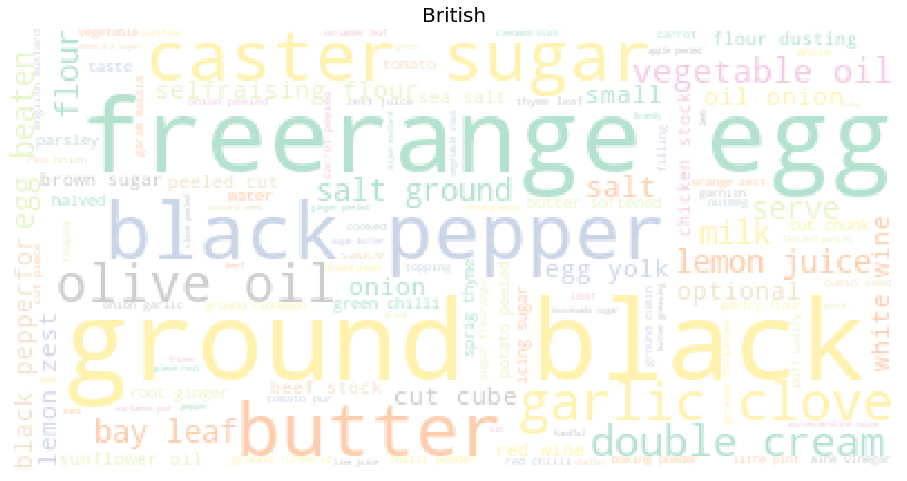

In [121]:
word_cloud(british.Ingredients,"British")

In [122]:
from collections import Counter
results = Counter()
df['Ingredients'].str.lower().str.split().apply(results.update)
pd.DataFrame(print(results))

Counter({'oil': 4195, 'ground': 3736, 'onion': 2826, 'garlic': 2818, 'clove': 2671, 'black': 2617, 'salt': 2568, 'cut': 2558, 'pepper': 2546, 'olive': 2539, 'sugar': 2229, 'leaf': 2203, 'peeled': 2130, 'red': 2108, 'butter': 2068, 'egg': 1820, 'white': 1755, 'chilli': 1675, 'juice': 1673, 'flour': 1663, 'tomato': 1633, 'seed': 1581, 'dried': 1544, 'chicken': 1386, 'sauce': 1359, 'small': 1337, 'lemon': 1307, 'vegetable': 1253, 'coriander': 1247, 'piece': 1222, 'freerange': 1202, 'water': 1101, 'wine': 1070, 'green': 1058, 'removed': 1049, 'powder': 1006, 'ginger': 968, 'lime': 938, 'caster': 938, 'cream': 919, 'milk': 892, 'stock': 886, 'rice': 885, 'vinegar': 767, 'whole': 758, 'cumin': 745, 'parsley': 740, 'potato': 715, 'cheese': 704, 'serve': 688, 'sprig': 651, 'drained': 639, 'stick': 606, 'dry': 603, 'inch': 603, 'halved': 602, 'beef': 590, 'x': 589, 'slice': 586, 'taste': 573, 'root': 570, 'sea': 569, 'thyme': 566, 'zest': 564, 'bean': 558, 'shallot': 545, 'paste': 535, 'double'

""


# MODEL

In [123]:
X = df.Ingredients
y = df.Cuisine

In [124]:
# Count vec uygulanarak modellere bakılması

def count_vec_models(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 43)
    
    CV = CountVectorizer()
    
    X_train_CV = CV.fit_transform(X_train)
    X_test_CV = CV.transform(X_test)
    
    #Logistic Reg
    lr = LogisticRegression()
    
    lr.fit(X_train_CV, y_train)
    y_pred_logcv = lr.predict(X_test_CV)
    
    scorelog = np.mean(y_pred_logcv == y_test)
    
    #Multinomial NB
    naive_multi = MultinomialNB(fit_prior=False)

    naive_multi.fit(X_train_CV, y_train)
    y_pred_multi_cv = naive_multi.predict(X_test_CV)
    
    scoremulti = np.mean(y_pred_multi_cv == y_test)
    
    #Bernouill NB
    naive_berno = BernoulliNB()
    
    naive_berno.fit(X_train_CV, y_train)
    y_pred_berno_cv = naive_berno.predict(X_test_CV)
    
    scoreberno = np.mean(y_pred_berno_cv == y_test)
    
    #Support Vector Mach.
    
    svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=43)
    
    svm.fit(X_train_CV, y_train)
    y_pred_svm = svm.predict(X_test_CV)
    
    scoresvm = np.mean(y_pred_svm == y_test)
    
    #Random Forest
    
    rf = RandomForestClassifier()
    
    rf.fit(X_train_CV, y_train)
    y_pred_rf = rf.predict(X_test_CV)
    
    scorerf = np.mean(y_pred_rf == y_test)
    
    liste = {"Model": ["Logistic Regresyon", "Multinomial NB","Bernouilli NB","SVM","Random Forest"],
            "Train Accuracy": [lr.score(X_train_CV, y_train), naive_multi.score(X_train_CV, y_train), naive_berno.score(X_train_CV, y_train),
                              svm.score(X_train_CV, y_train),rf.score(X_train_CV, y_train)],
            "Test Accuracy":[lr.score(X_test_CV, y_test), naive_multi.score(X_test_CV, y_test), naive_berno.score(X_test_CV, y_test),
                              svm.score(X_test_CV, y_test),rf.score(X_test_CV, y_test)] }
    return pd.DataFrame(liste)

In [125]:
# Count vec ngram uygulanarak modellere bakılması


def count_vec_ngram(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 43)
    
    CV = CountVectorizer(ngram_range=(1,2), binary=True)
    
    X_train_CV = CV.fit_transform(X_train)
    X_test_CV = CV.transform(X_test)
    
    #Logistic Reg
    lr = LogisticRegression()
    
    lr.fit(X_train_CV, y_train)
    y_pred_logcv = lr.predict(X_test_CV)
    
    scorelog = np.mean(y_pred_logcv == y_test)
    
    #Multinomial NB
    naive_multi = MultinomialNB(fit_prior=False)

    naive_multi.fit(X_train_CV, y_train)
    y_pred_multi_cv = naive_multi.predict(X_test_CV)
    
    scoremulti = np.mean(y_pred_multi_cv == y_test)
    
    #Bernouill NB
    naive_berno = BernoulliNB()
    
    naive_berno.fit(X_train_CV, y_train)
    y_pred_berno_cv = naive_berno.predict(X_test_CV)

    scoreberno = np.mean(y_pred_berno_cv == y_test)
    
    #Support Vector Mach.
    
    svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=43)
    
    svm.fit(X_train_CV, y_train)
    y_pred_svm = svm.predict(X_test_CV)
    
    scoresvm = np.mean(y_pred_svm == y_test)
    
    #Random Forest
    
    rf = RandomForestClassifier()
    
    rf.fit(X_train_CV, y_train)
    y_pred_rf = rf.predict(X_test_CV)
    
    scorerf = np.mean(y_pred_rf == y_test)
    
    liste = {"Model": ["Logistic Regresyon", "Multinomial NB","Bernouilli NB","SVM","Random Forest"],
            "Train Accuracy": [lr.score(X_train_CV, y_train), naive_multi.score(X_train_CV, y_train), naive_berno.score(X_train_CV, y_train),
                              svm.score(X_train_CV, y_train),rf.score(X_train_CV, y_train)],
            "Test Accuracy":[lr.score(X_test_CV, y_test), naive_multi.score(X_test_CV, y_test), naive_berno.score(X_test_CV, y_test),
                              svm.score(X_test_CV, y_test),rf.score(X_test_CV, y_test)] }
    return pd.DataFrame(liste)



In [126]:
# TF IDF uygulanarak modellere bakılması

def tfidf_vec(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 43)
    
    tfidf = TfidfVectorizer()
    
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    
    #Logistic Reg
    lr = LogisticRegression()
    
    lr.fit(X_train_tfidf, y_train)
    y_pred_logcv = lr.predict(X_test_tfidf)
    
    scorelog = np.mean(y_pred_logcv == y_test)
    
    #Multinomial NB
    naive_multi = MultinomialNB(fit_prior=False)

    naive_multi.fit(X_train_tfidf, y_train)
    y_pred_multi_cv = naive_multi.predict(X_test_tfidf)
    
    scoremulti = np.mean(y_pred_multi_cv == y_test)
    
    #Bernouill NB
    naive_berno = BernoulliNB()
    
    naive_berno.fit(X_train_tfidf, y_train)
    y_pred_berno_cv = naive_berno.predict(X_test_tfidf)
    
    scoreberno = np.mean(y_pred_berno_cv == y_test)
    
    #Support Vector Mach.
    
    svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=43)
    
    svm.fit(X_train_tfidf, y_train)
    y_pred_svm = svm.predict(X_test_tfidf)
    
    scoresvm = np.mean(y_pred_svm == y_test)
    
    #Random Forest
    
    rf = RandomForestClassifier()
    
    rf.fit(X_train_tfidf, y_train)
    y_pred_rf = rf.predict(X_test_tfidf)
    
    scorerf = np.mean(y_pred_rf == y_test)
    
    liste = {"Model": ["Logistic Regresyon", "Multinomial NB","Bernouilli NB","SVM","Random Forest"],
            "Train Accuracy": [lr.score(X_train_tfidf, y_train), naive_multi.score(X_train_tfidf, y_train), naive_berno.score(X_train_tfidf, y_train),
                              svm.score(X_train_tfidf, y_train),rf.score(X_train_tfidf, y_train)],
            "Test Accuracy":[lr.score(X_test_tfidf, y_test), naive_multi.score(X_test_tfidf, y_test), naive_berno.score(X_test_tfidf, y_test),
                              svm.score(X_test_tfidf, y_test),rf.score(X_test_tfidf, y_test)] }
    return pd.DataFrame(liste)


In [127]:
# TF IDF ngram uygulanarak modellere bakılması

def tfidf_vec_ngram(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 43)
    
    tfidf = TfidfVectorizer(ngram_range=(1,2), binary=True)
    
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)
    
    #Logistic Reg
    lr = LogisticRegression()
    
    lr.fit(X_train_tfidf, y_train)
    y_pred_logcv = lr.predict(X_test_tfidf)
    
    scorelog = np.mean(y_pred_logcv == y_test)
    
    #Multinomial NB
    naive_multi = MultinomialNB(fit_prior=False)

    naive_multi.fit(X_train_tfidf, y_train)
    y_pred_multi_cv = naive_multi.predict(X_test_tfidf)
    
    scoremulti = np.mean(y_pred_multi_cv == y_test)
    
    #Bernouill NB
    naive_berno = BernoulliNB()
    
    naive_berno.fit(X_train_tfidf, y_train)
    y_pred_berno_cv = naive_berno.predict(X_test_tfidf)
    
    scoreberno = np.mean(y_pred_berno_cv == y_test)
    
    #Support Vector Mach.
    
    svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=43)
    
    svm.fit(X_train_tfidf, y_train)
    y_pred_svm = svm.predict(X_test_tfidf)
    
    scoresvm = np.mean(y_pred_svm == y_test)
    
    #Random Forest
    
    rf = RandomForestClassifier()
    
    rf.fit(X_train_tfidf, y_train)
    y_pred_rf = rf.predict(X_test_tfidf)
    
    scorerf = np.mean(y_pred_rf == y_test)
    
    liste = {"Model": ["Logistic Regresyon", "Multinomial NB","Bernouilli NB","SVM","Random Forest"],
            "Train Accuracy": [lr.score(X_train_tfidf, y_train), naive_multi.score(X_train_tfidf, y_train), naive_berno.score(X_train_tfidf, y_train),
                              svm.score(X_train_tfidf, y_train),rf.score(X_train_tfidf, y_train)],
            "Test Accuracy":[lr.score(X_test_tfidf, y_test), naive_multi.score(X_test_tfidf, y_test), naive_berno.score(X_test_tfidf, y_test),
                              svm.score(X_test_tfidf, y_test),rf.score(X_test_tfidf, y_test)] }
    return pd.DataFrame(liste)
    

In [128]:
def conf_matrix(model,X_train, X_test, y_train, y_test, title):
    
    mod = model
    
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    plt.figure(figsize=[12,5])
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, annot_kws = {'fontsize' : 14},
                fmt ="d",cmap="Blues").invert_yaxis()
    plt.title(title)


In [129]:
count_vec_models(X,y)

,Model,Train Accuracy,Test Accuracy
0,Logistic Regresyon,0.912404,0.671210
1,Multinomial NB,0.778772,0.712095
2,Bernouilli NB,0.759378,0.718058
3,SVM,0.880435,0.702726
4,Random Forest,0.944373,0.676320


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 43)
    
tfidf = TfidfVectorizer()
    
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

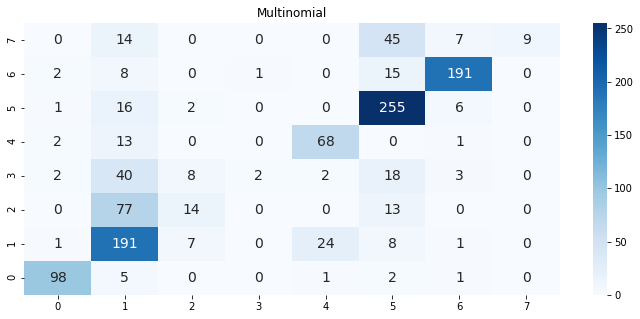

In [131]:
conf_matrix(MultinomialNB(), X_train_tfidf, X_test_tfidf, y_train, y_test, "Multinomial")

# Grid Search

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 43)

In [134]:
classifier = Pipeline([('vect', CountVectorizer(lowercase=False)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'vect__max_df': ( 0.7,0.8,0.9,1.0),
              'vect__min_df': (1,2),    
              'clf__alpha': ( 0.022,0.025, 0.028),
}
gs_clf = GridSearchCV(classifier, parameters,n_jobs=-1, verbose=1,cv=5)
gs_clf.fit(X_train, y_train)
best_parameters = gs_clf.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.2s


	clf__alpha: 0.028
	vect__max_df: 0.7
	vect__min_df: 2
	vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   37.1s finished


In [135]:
gs_clf.best_score_

0.7156851525121993